In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

df = pd.read_csv('comments.csv',delimiter=';')
df.drop(df.columns[1],axis=1,inplace=True)

def preprocess(text):
    t = text.lower()
    # t = re.sub('_',r'',t)
    # t = re.sub('\d+',r'',t)
    t = re.sub(r'@[^ ]*',r'',t)
    t = re.sub(r'\W+',r' ',t)
    t = re.sub(r'(could|would|like|list|net|mailto|subject|http)', '', t)
    t = re.sub(r'\b\w{1,3}\b', '', t)
    stopwords_list = stopwords.words('english')
    txt = ' '.join([word for word in t.split() if word not in stopwords_list])
    return txt

lemmatizer = WordNetLemmatizer()


df['documents'] = [' '.join([lemmatizer.lemmatize(preprocess(email))])
                 .strip() for email in df['comment']]

documents = df['documents']

no_features = 1000

# NMF is able to use tf-idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features,ngram_range=(1,2), stop_words='english')
# tfidf = tfidf_vectorizer.fit_transform(documents)
# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 5

# Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha_W=.5, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people technology human world humans think need control government make
Topic 1:
google prevent asked openai make future facebook power money progress
Topic 2:
systems nuclear climate change regulation self stop computers humanity good
Topic 3:
human intelligence think artificial extinction technology people risk society make
Topic 4:
government reality evolution humanity creatures fiction late humans movie congress


In [11]:
no_top_words

10

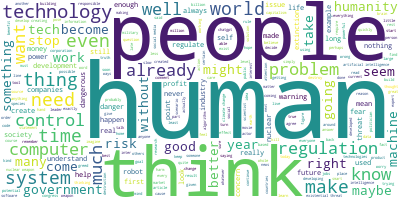

In [5]:
from wordcloud import WordCloud

long_string = ','.join(list(df.documents.values))

wordcloud = WordCloud(background_color="white", max_words=250, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()